# semiproject01_다음 포털 기사 댓글, 답댓글 크롤링 
> 댓글만 크롤링하던 기존 크롤링에서 한 발 더 나아가 댓글에 달린 답댓글까지 크롤링할 수 있는 코드를 만들어 본다. 

In [23]:
# 라이브러리 불러오기
import requests 
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime
import time
import re

In [24]:
# 기사 검색어 지정
query = '비혼'
url = 'https://search.daum.net/search?w=news&q='+query 

urls_list = [] #기사 url 담을 list

In [25]:
# html 소스에서 기사 url 전부 뽑아내기
for i in range(1): 
    print (i)
    url=url+"&p="+str(i)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    for urls in source.find_all('a', {'class' : "f_nb"}): # urls 중 a 태그 속에 'f_nb'라는 class를 가진 urls 추출
        urls_list.append(urls["href"]) # 해당 urls에서 링크 부분에 해당하는 href 부분만 추출

print(urls_list)
# urls_list[0]

0
['http://v.media.daum.net/v/20210212053111138', 'http://v.media.daum.net/v/20210211064019269', 'http://v.media.daum.net/v/20210209141054250', 'http://v.media.daum.net/v/20210209093135542', 'http://v.media.daum.net/v/20210129125111331', 'http://v.media.daum.net/v/20210129205728075']


In [26]:
print(len(urls_list))

6


In [27]:
# 본격적인 크롤링 시작
# 핵심 라이브러리는 BeautifulSoup, Selenium 
# Selenium 가상 브라우저를 사용하는 이유는 댓글의 로딩이 페이지 내용보다 더 느리기 때문
from selenium import webdriver
from bs4 import BeautifulSoup
import time

# 크롤링을 위한 준비 단계
# 크롬 드라이버 파일 불러오기(크롬이 아닌 다른 브라우저에서는 다른 파일이 요구됨)
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 
comments=[] #댓글들 담을 list

# 답댓글 크롤링할 수 있는 코드
for url in urls_list:
    try:
        print(url+' 크롤링 중입니다')
        driver.get(url)
        time.sleep(3) #댓글 불러오기 대기
        
        finish_flag = 1 # 댓글 더보기 버튼 클릭 횟수 제한
        
        while finish_flag == 1: 
            try:
                # 답댓글 열기 버튼의 css_selector 클릭
                driver.find_elements_by_css_selector("#comment > div > div.reply_wrap > div.alex_more > a").click()
#                 for i in range(len(links)):
#                     i.click()
                
#                 link_more = source.select("div > span > button.reply_count")
                driver.find_elements_by_css_selector("#comment > div > div > span.box_inner > button").click()
#                 for button in range(len(link_more)):
#                     button.click()
                
            except:
                finish_flag = 0 # false일 경우 멈추고 아래 코드로 이동
            
                    
            html = driver.page_source

            bs = BeautifulSoup(html, 'html.parser')
            contents = bs.find_all("p", {"class" : "desc_txt font_size_17"}) #댓글 담긴 span tag 찾기
            for content in contents :
                print(content.text)
                comments.append(content.text)

    except:
        print("존재하지 않는 url입니다.")

        

# 크롤링 중 같은 페이지가 반복되는 오류 있음. 크롤링이 멈추지 않음. 
# 답댓글도 크롤링이 안됨.

# 댓글 전체와 답댓글을 전부 크롤링하려는 과정에서 코드 문제(전체 댓글 열기-> 답댓글 추려내기 과정이 연결되지 않음)

http://v.media.daum.net/v/20210212053111138 크롤링 중입니다
주변에 쏠로들은 외로워 보이고
애 있는 사람들은 애 때메 개고생하고
그나마 딩크가 젤 나아 보인다 
애 있는 사람들은 애가 있어 기쁘네 마네 하면서도 
자기들이 겪어온 육아단계를 훈장처럼 여기고 여기저기 떠들려 하지만 
딩크 앞에선 속수무책이거든 
괜히 낳아놓고 성조숙증이네 ADHD네 전전긍긍ㅋㅋ
결혼해서 딩크로 사는 게 젤 나은 듯
무자식이 상팔자다
혼자사는게  최고!!!
http://v.media.daum.net/v/20210211064019269 크롤링 중입니다
의무는 없으면서 권리만  누릴수 있는  가족제도를 법으로  만들어 달라는  얘기가 말이되는 얘기냐? 의무 안지는 법테두리밖의 편리한  삶을 택했으면  의무가 수반되는 법테두리 안의 권리보호에서 제외되는 것이 당연한것 아닌가?
결론은 이렇다! 저 동거부부들은 법과 제도가 불편하니... 자기들 도움이 되는 법과 제도만 도와주길 바란다는.... 자기 입맛에 맞는 음식을 골라먹는 뷔폐식의 사고방식으로 법과 제도를 바라고 있다는거다!!!
의무는 싫고 권리만 주장..ㅋ
법과 제도를 따르기 싫으면 권리도 주장마시길..
http://v.media.daum.net/v/20210209141054250 크롤링 중입니다
http://v.media.daum.net/v/20210209093135542 크롤링 중입니다
http://v.media.daum.net/v/20210129125111331 크롤링 중입니다
http://v.media.daum.net/v/20210129205728075 크롤링 중입니다
아이를 혼자 키우기쉽나? 둘이키워도 벅찬게 양육인데 혼자키우는것을 합법화하도록 부추키나? sbs정신차려라!!! 좋은일에 앞장서야할 방송이 미혼모. 출산으로 일어날 일들로 사회 악영향과 어려움을 책임질건가?
이제 남자는 1명만  있으면 되겠네ᆢ정자생산용으로 있으면 되는존재?  애기는 자기맘대로 낳고싶고, 가족의 구성책임은 안지고싶고

In [28]:
len(comments) #댓글 수

9

In [29]:
comments_str=" ".join(comments) #댓글 string으로 변환

comments_str

'주변에 쏠로들은 외로워 보이고\n애 있는 사람들은 애 때메 개고생하고\n그나마 딩크가 젤 나아 보인다 \n애 있는 사람들은 애가 있어 기쁘네 마네 하면서도 \n자기들이 겪어온 육아단계를 훈장처럼 여기고 여기저기 떠들려 하지만 \n딩크 앞에선 속수무책이거든 \n괜히 낳아놓고 성조숙증이네 ADHD네 전전긍긍ㅋㅋ\n결혼해서 딩크로 사는 게 젤 나은 듯 무자식이 상팔자다 혼자사는게  최고!!! 의무는 없으면서 권리만  누릴수 있는  가족제도를 법으로  만들어 달라는  얘기가 말이되는 얘기냐? 의무 안지는 법테두리밖의 편리한  삶을 택했으면  의무가 수반되는 법테두리 안의 권리보호에서 제외되는 것이 당연한것 아닌가? 결론은 이렇다! 저 동거부부들은 법과 제도가 불편하니... 자기들 도움이 되는 법과 제도만 도와주길 바란다는.... 자기 입맛에 맞는 음식을 골라먹는 뷔폐식의 사고방식으로 법과 제도를 바라고 있다는거다!!! 의무는 싫고 권리만 주장..ㅋ\n법과 제도를 따르기 싫으면 권리도 주장마시길.. 아이를 혼자 키우기쉽나? 둘이키워도 벅찬게 양육인데 혼자키우는것을 합법화하도록 부추키나? sbs정신차려라!!! 좋은일에 앞장서야할 방송이 미혼모. 출산으로 일어날 일들로 사회 악영향과 어려움을 책임질건가? 이제 남자는 1명만  있으면 되겠네ᆢ정자생산용으로 있으면 되는존재?  애기는 자기맘대로 낳고싶고, 가족의 구성책임은 안지고싶고,?  참 이기적이다~ 비난받을일은 아니지만 권장할일도 아니다! 더욱이 울나라 현재수준으로는 꿈도 꾸지말아야한다! 100년후에 생각해보던가!!둘도 하나를 똑바로 키워내는사람이 별로 없는데 절대 쉽게 논할일 아니다! 출생률 감소는 세계적인 현상인데 복리개판나라에서 출생률 떨어지는건 당연한 이치인데 호들갑떨지 말길'

In [30]:
# comments_str 저장
save=open("daum_comments.txt", 'w' , encoding='utf-8' )
save.write(comments_str)
save.close()

In [31]:
# 댓글 텍스트가 담긴 파일 불러오기
with open('daum_comments.txt', 'r', encoding= 'utf-8') as f: 
    doc = ''  # 리뷰 데이터를 담기 위한 String 변수 생성
    lines = f.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
    for line in lines:  # for문을 통해 lines에 있는 모든 텍스트를 doc2에 이어 붙임
        doc += line

In [32]:
# 문서 내용 확인
doc

'주변에 쏠로들은 외로워 보이고\n애 있는 사람들은 애 때메 개고생하고\n그나마 딩크가 젤 나아 보인다 \n애 있는 사람들은 애가 있어 기쁘네 마네 하면서도 \n자기들이 겪어온 육아단계를 훈장처럼 여기고 여기저기 떠들려 하지만 \n딩크 앞에선 속수무책이거든 \n괜히 낳아놓고 성조숙증이네 ADHD네 전전긍긍ㅋㅋ\n결혼해서 딩크로 사는 게 젤 나은 듯 무자식이 상팔자다 혼자사는게  최고!!! 의무는 없으면서 권리만  누릴수 있는  가족제도를 법으로  만들어 달라는  얘기가 말이되는 얘기냐? 의무 안지는 법테두리밖의 편리한  삶을 택했으면  의무가 수반되는 법테두리 안의 권리보호에서 제외되는 것이 당연한것 아닌가? 결론은 이렇다! 저 동거부부들은 법과 제도가 불편하니... 자기들 도움이 되는 법과 제도만 도와주길 바란다는.... 자기 입맛에 맞는 음식을 골라먹는 뷔폐식의 사고방식으로 법과 제도를 바라고 있다는거다!!! 의무는 싫고 권리만 주장..ㅋ\n법과 제도를 따르기 싫으면 권리도 주장마시길.. 아이를 혼자 키우기쉽나? 둘이키워도 벅찬게 양육인데 혼자키우는것을 합법화하도록 부추키나? sbs정신차려라!!! 좋은일에 앞장서야할 방송이 미혼모. 출산으로 일어날 일들로 사회 악영향과 어려움을 책임질건가? 이제 남자는 1명만  있으면 되겠네ᆢ정자생산용으로 있으면 되는존재?  애기는 자기맘대로 낳고싶고, 가족의 구성책임은 안지고싶고,?  참 이기적이다~ 비난받을일은 아니지만 권장할일도 아니다! 더욱이 울나라 현재수준으로는 꿈도 꾸지말아야한다! 100년후에 생각해보던가!!둘도 하나를 똑바로 키워내는사람이 별로 없는데 절대 쉽게 논할일 아니다! 출생률 감소는 세계적인 현상인데 복리개판나라에서 출생률 떨어지는건 당연한 이치인데 호들갑떨지 말길'

In [33]:
# 라이브러리 불러오기
from collections import Counter
from konlpy.tag import Twitter

# articles = df['Article'].tolist()
# articles = ''.join(articles)

twitter = Twitter()
raw_pos_tagged = twitter.pos(doc, norm=True, stem=True)

raw_pos_tagged

C:\Users\CUCHO\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('주변', 'Noun'),
 ('에', 'Josa'),
 ('쏠', 'Noun'),
 ('로', 'Josa'),
 ('들다', 'Verb'),
 ('외로워', 'Noun'),
 ('보이', 'Noun'),
 ('고', 'Josa'),
 ('\n', 'Foreign'),
 ('애', 'Noun'),
 ('있다', 'Adjective'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('은', 'Josa'),
 ('애', 'Noun'),
 ('때메', 'Noun'),
 ('개', 'Noun'),
 ('고생', 'Noun'),
 ('하고', 'Josa'),
 ('\n', 'Foreign'),
 ('그나마', 'Adverb'),
 ('딩크', 'Noun'),
 ('가', 'Josa'),
 ('젤', 'Noun'),
 ('나아', 'Adverb'),
 ('보이다', 'Verb'),
 ('애', 'Noun'),
 ('있다', 'Adjective'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('은', 'Josa'),
 ('애가', 'Noun'),
 ('있다', 'Adjective'),
 ('기쁘다', 'Adjective'),
 ('마네', 'Noun'),
 ('하다', 'Verb'),
 ('자기', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('겪다', 'Verb'),
 ('온', 'Noun'),
 ('육', 'Modifier'),
 ('아단', 'Noun'),
 ('계', 'Suffix'),
 ('를', 'Josa'),
 ('훈장', 'Noun'),
 ('처럼', 'Josa'),
 ('여기', 'Noun'),
 ('고', 'Josa'),
 ('여기저기', 'Noun'),
 ('떠들다', 'Verb'),
 ('하지만', 'Conjunction'),
 ('딩크', 'Noun'),
 ('앞', 'Noun'),
 ('에선', 'Josa'),
 ('속수무책', 'Noun'),
 ('이', 'Jos

In [34]:
# 댓글 문장 필터링 테스트
test_str='완전 위해 절대 그게 아무'
test=twitter.pos(test_str, norm=True, stem=True)
print(test)

[('완전', 'Noun'), ('위해', 'Noun'), ('절대', 'Noun'), ('그게', 'Noun'), ('아무', 'Noun')]


In [35]:
# 필요없는 동사 & 속어 & 부사 제거 

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다','어떻다','ㅋㅋ','ㅋㅋㅋ','ㅠㅠ','ㅉㅉ','ㅎㅎ','없다','위해','완전','절대','그게','아무','건가','나다','모두','이미'] 
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign","Adverb","Suffix"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            if(word[0].isalpha()): #숫자 뺌
                word_cleaned.append(word[0])

# 필터링한 댓글 텍스트 단어 카운트
word_counted = Counter(word_cleaned)
# 자료형을 dict로 변경
word_dic = dict(word_counted)
        
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

sorted_word_dic

[('자기', 4),
 ('의무', 4),
 ('권리', 4),
 ('제도', 4),
 ('키우다', 4),
 ('사람', 3),
 ('딩크', 3),
 ('혼자', 3),
 ('낳다', 2),
 ('살다', 2),
 ('얘기', 2),
 ('테두리', 2),
 ('당연하다', 2),
 ('바라다', 2),
 ('싫다', 2),
 ('주장', 2),
 ('말다', 2),
 ('쉬다', 2),
 ('출생률', 2),
 ('주변', 1),
 ('들다', 1),
 ('외로워', 1),
 ('보이', 1),
 ('때메', 1),
 ('고생', 1),
 ('보이다', 1),
 ('애가', 1),
 ('기쁘다', 1),
 ('마네', 1),
 ('겪다', 1),
 ('아단', 1),
 ('훈장', 1),
 ('여기', 1),
 ('여기저기', 1),
 ('떠들다', 1),
 ('하지만', 1),
 ('속수무책', 1),
 ('거들다', 1),
 ('성조숙증', 1),
 ('ADHD', 1),
 ('전전긍긍', 1),
 ('결혼', 1),
 ('나은', 1),
 ('무자식', 1),
 ('상팔자', 1),
 ('최고', 1),
 ('누리다', 1),
 ('가족제도', 1),
 ('만들다', 1),
 ('달라', 1),
 ('안지', 1),
 ('편리하다', 1),
 ('택했으', 1),
 ('수반', 1),
 ('보호', 1),
 ('제외', 1),
 ('결론', 1),
 ('거부', 1),
 ('부들', 1),
 ('불편하다', 1),
 ('도움', 1),
 ('도와주다', 1),
 ('입맛', 1),
 ('맞다', 1),
 ('음식', 1),
 ('고르다', 1),
 ('먹다', 1),
 ('뷔폐식', 1),
 ('사고방식', 1),
 ('따르다', 1),
 ('아이', 1),
 ('벅차다', 1),
 ('양육', 1),
 ('합법', 1),
 ('화하다', 1),
 ('부추키다', 1),
 ('sbs', 1),
 ('정신차려라', 1),
 ('좋다', 1),
 ('앞

In [36]:
# 빈도 순으로 상위 100개에 해당하는 단어까지만 추려내어 번역을 진행 (늘릴 수 있습니다.)

translation_target = sorted_word_dic[:100] 
translation_target[-1] # 상위 100번째에 해당하는 단어의 빈도수를 확인

('비난', 1)

In [37]:
translation_target = {}
for item in word_dic: #item에 키값 들어감
    if word_dic[item] >= 31: # 위에서 확인한 빈도수를 기반으로 번역 대상 단어 선정
        translation_target[item] = word_dic[item]

In [38]:
print(translation_target)

{}


In [39]:
#워드 클라우드로 시각화
# 라이브러리 불러오기
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# WordCloud 객체를 생성
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

# word_cloud = WordCloud().generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수 있습니다.
# word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
#                        width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
#                        # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
#                        background_color='white')

In [ ]:
# word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

In [ ]:
# # 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

# plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
# plt.imshow(word_cloud) # image show
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

In [ ]:
# word_cloud.to_file("word_cloud.png")

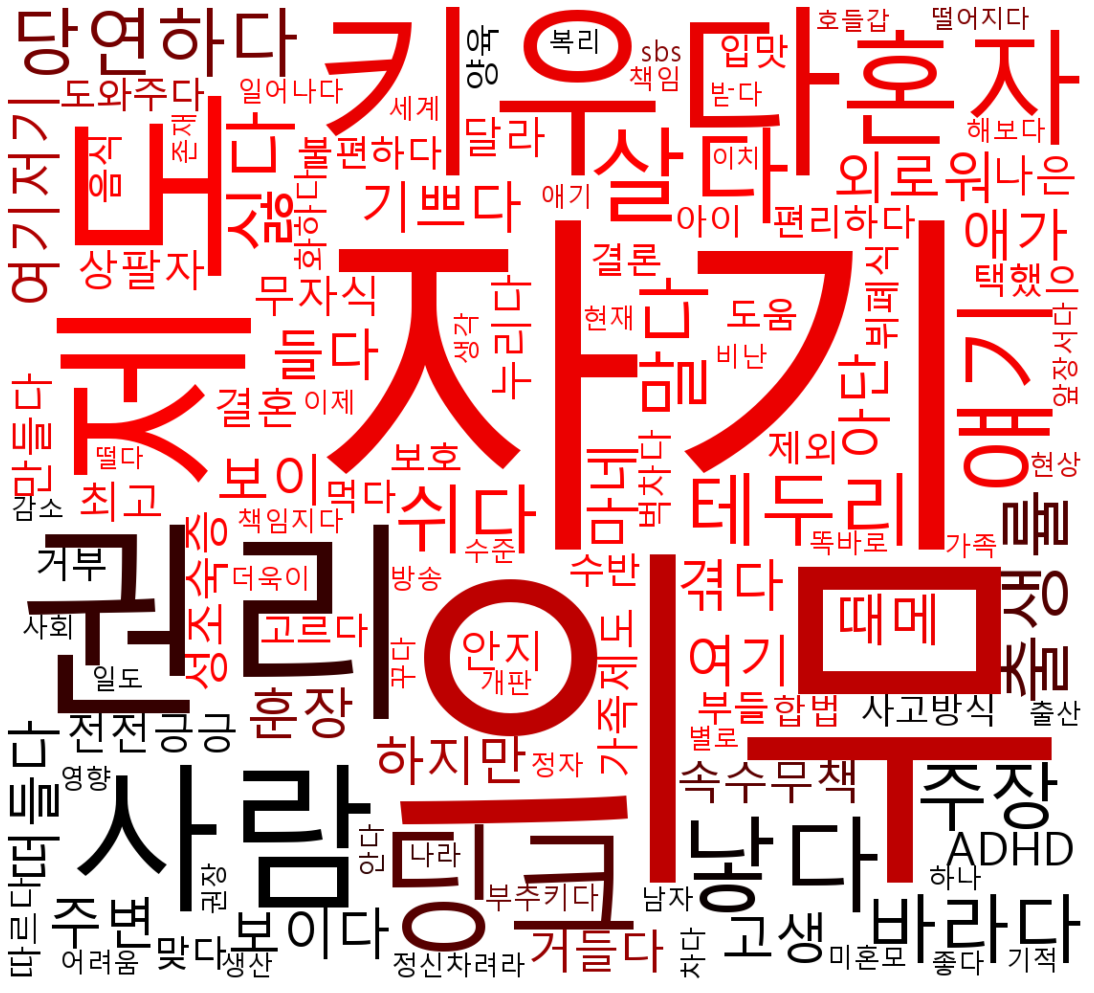

In [41]:
from wordcloud import ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체

coloring = np.array(Image.open("heart.png"))
image_colors = ImageColorGenerator(coloring)

word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=coloring, 
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
# plt.imshow(word_cloud.?(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
word_cloud.to_file("daum_word_cloud_coloring.png")

In [ ]:
coloring = np.array(Image.open("./yellow-house.png"))
image_colors = ImageColorGenerator(coloring)

word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=coloring, 
                       background_color='white').generate(doc)

plt.figure(figsize=(15,15)) # 이 부분을 수정하면 화면에서 보여지는 워드클라우드의 크기 조절 가능  
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()